In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

***

In [2]:
%%time
train = pd.read_parquet("../data/processed/train.parquet")
test = pd.read_parquet("../data/processed/test.parquet")
train_labels = pd.read_parquet("../data/processed/train_labels.parquet")

CPU times: user 35.6 s, sys: 26.2 s, total: 1min 1s
Wall time: 11.7 s


In [3]:
train["S_2"] = pd.to_datetime(train["S_2"])
test["S_2"] = pd.to_datetime(test["S_2"])

***
## macro insights

In [4]:
train_labels.target.value_counts() / len(train_labels)

0    0.741066
1    0.258934
Name: target, dtype: float64

In [5]:
100 * train.customer_ID.nunique() / len(train)

8.29643071953453

In [6]:
train.customer_ID.value_counts()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
a3111280bfa1ed8fafd0b06839eb707f4538497e8087cb62958bb03e1bdde214    13
a31376930229162f886c091e5a56a528f81c10a523285828ed05a6e9ccf56722    13
a312c595dfaee96c8a597107d2754a49b1acfd127400d98991762d87837b1b65    13
a312aff722e7230f9d6a313ff777d6f00166c6bada21a333982426758a2e2a9d    13
                                                                    ..
a84839802f1f37a86a7fe34ddba4791d33d878df3937b509841def0a9e252748     1
01f4f7b14d83b6a8f88e4355279224615da083b19e3e5f15b98f274ced8cf752     1
eef07ea56302cebcd57374c6565bb3e5c7af856796d9cbc31ed42aa0fc73b7fc     1
d192480082e86e3b4da68f014b284f2a2624b45956eed279416c796de043b7ce     1
d9ea3cffff889b522a69bde89aee382dcff8bffe32c9a38653bdaa2ff4330041     1
Name: customer_ID, Length: 458913, dtype: int64

In [41]:
train.customer_ID.value_counts().describe(percentiles=np.arange(0,1,0.1))

count    458913.000000
mean         12.053376
std           2.610273
min           1.000000
0%            1.000000
10%           9.000000
20%          13.000000
30%          13.000000
40%          13.000000
50%          13.000000
60%          13.000000
70%          13.000000
80%          13.000000
90%          13.000000
max          13.000000
Name: customer_ID, dtype: float64

In [20]:
mrg = pd.merge(train[["customer_ID"]].drop_duplicates(), test[["customer_ID"]].drop_duplicates(), indicator=True, how="outer")
mrg._merge.value_counts()

right_only    924621
left_only     458913
both               0
Name: _merge, dtype: int64

***
## time

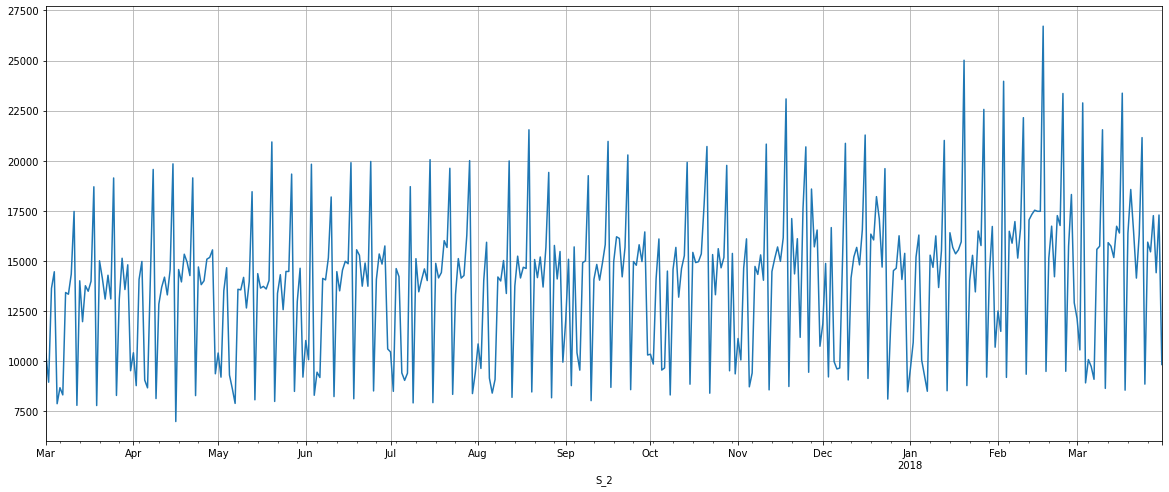

In [29]:
plt.figure(figsize=(20,8))
train.groupby("S_2")["customer_ID"].count().plot()
plt.grid()
plt.show()

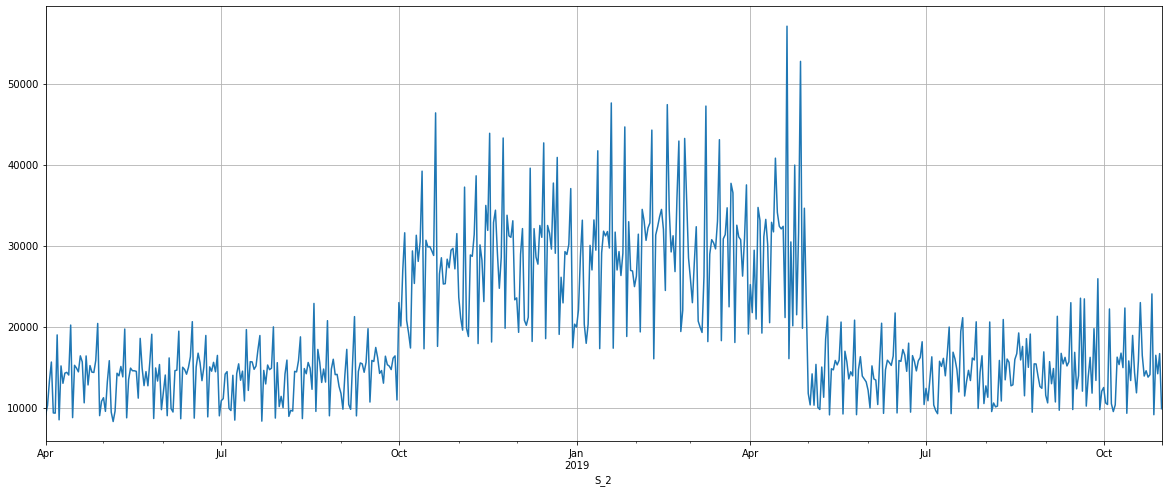

In [30]:
plt.figure(figsize=(20,8))
test.groupby("S_2")["customer_ID"].count().plot()
plt.grid()
plt.show()

In [32]:
display(train.S_2.min())
display(train.S_2.max())

Timestamp('2017-03-01 00:00:00')

Timestamp('2018-03-31 00:00:00')

In [33]:
display(test.S_2.min())
display(test.S_2.max())

Timestamp('2018-04-01 00:00:00')

Timestamp('2019-10-31 00:00:00')

***
## labels

In [35]:
train = pd.merge(train, train_labels, how="inner")
train

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.0048

In [45]:
pd.merge(train.query("target == 1")[["customer_ID"]], train.query("target == 0")[["customer_ID"]])

,customer_ID


***